In [35]:
import tensorflow as tf
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from keras.utils import load_img, img_to_array


In [36]:
#Here we pass our dataset and do some data Augmentation
def generator(dir, gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255), 
              shuffle=True,batch_size=1,
              target_size=(24,24),
              class_mode='categorical'):
    
    return gen.flow_from_directory(dir,batch_size=batch_size,
                                   shuffle=shuffle,color_mode='grayscale',
                                   class_mode=class_mode,
                                   target_size=target_size)

In [37]:
#Here we pass our datasets as train and valid(test) batches.
#this dataset would be available as a separate link so make sure you make correct paths.
BS= 32 
TS=(24,24)
train_batch= generator(r"C:\Users\yashm.000\Desktop\Study Zone\Private Folder\Projects\Drowsyness Detection\Drowsiness_Detection_Dataset\dataset_new\train",shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator(r"C:\Users\yashm.000\Desktop\Study Zone\Private Folder\Projects\Drowsyness Detection\Drowsiness_Detection_Dataset\dataset_new\test",shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

# train_data_dir = r"C:\Users\yashm.000\Desktop\Study Zone\Private Folder\Projects\Drowsyness Detection\Drowsiness_Detection_Dataset\dataset_new\train"
# val_data_dir = r"C:\Users\yashm.000\Desktop\Study Zone\Private Folder\Projects\Drowsyness Detection\Drowsiness_Detection_Dataset\dataset_new\test"

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13


In [38]:
# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(4, activation='softmax')
])


C:\Users\yashm.000\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [43]:
#we here compile our model with Adam optimizer and use categorical crossentropy(multiclass classification) as our loss function with accuracy metrics
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# we would run 15 epochs as of now to train our detection model
train_model = model.fit(train_batch, 
                                  validation_data=valid_batch,
                                  epochs=10,
                                  steps_per_epoch=SPE,
                                  validation_steps=VS)
#Now we will save this model, so whenever hereafter we run the code model will get saved by the name of drowsiness_detection.h5
model.save('drowsiness_detection.h5', overwrite = True)

Epoch 1/10


C:\Users\yashm.000\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.5608 - loss: 0.9867 - val_accuracy: 0.7740 - val_loss: 0.4346
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.6875 - loss: 0.2703 - val_accuracy: 0.7647 - val_loss: 0.2499
Epoch 3/10


C:\Users\yashm.000\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.7812 - loss: 0.4446 - val_accuracy: 0.8101 - val_loss: 0.3888
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7188 - loss: 0.2264 - val_accuracy: 0.7059 - val_loss: 0.2286
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.7999 - loss: 0.3749 - val_accuracy: 0.8197 - val_loss: 0.3453
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8438 - loss: 0.1986 - val_accuracy: 0.8235 - val_loss: 0.1891
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8357 - loss: 0.3292 - val_accuracy: 0.8510 - val_loss: 0.3041
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8438 - loss: 0.1834 - val_accuracy: 0.7059 - val_loss: 0.3816
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.8631 - loss: 0.2986 - val_accuracy: 0.8438 - val_loss: 0.3178
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8125 - loss: 0.1811 - val_accuracy: 0.8824 - val_los

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
[0.27522935779816515, 0.2523364485981308, 0.20161290322580644, 0.25806451612903225]
[0.27522935779816515, 0.24770642201834864, 0.22935779816513763, 0.22641509433962265]
[0.27522935779816515, 0.25, 0.2145922746781116, 0.24120603015075376]


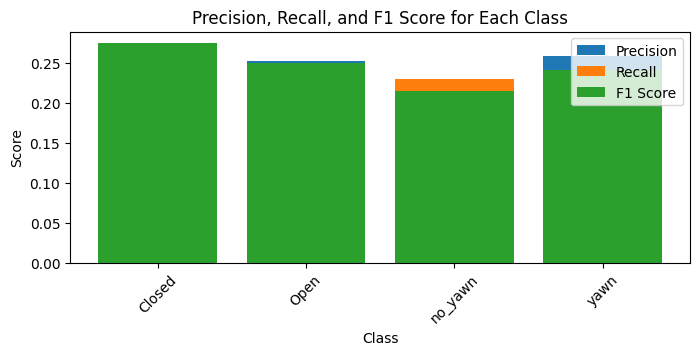

In [61]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate predictions for the test data
y_true = valid_batch.classes
y_pred = np.argmax(model.predict(valid_batch), axis=1)

# Generate classification report
class_names = list(valid_batch.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

print(precision)
print(recall)
print(f1_score)
# Plot precision, recall, and F1 score for each class
plt.figure(figsize=(8, 3))
plt.bar(class_names, precision, label='Precision')
plt.bar(class_names, recall, label='Recall')
plt.bar(class_names, f1_score, label='F1 Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for Each Class')
plt.legend()
plt.xticks(rotation=45)
plt.show()


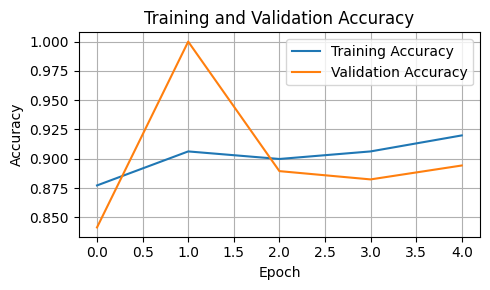

In [52]:

from keras.utils import load_img, img_to_array
train_accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(5, 3))
plt.plot(range(len(train_accuracy)), train_accuracy, label='Training Accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ... Rest of your code ... (saving the model)


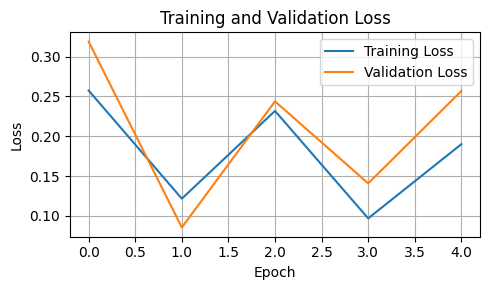

In [54]:
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(5,3))
plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

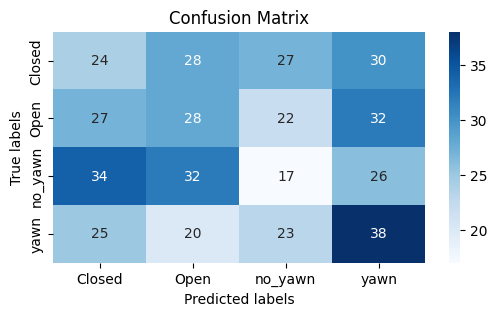

In [55]:
# Heatmap with Seaborn:
# Instead of using Matplotlib directly, you can use Seaborn's heatmap function, which provides additional customization options and a cleaner appearance.

import seaborn as sns

# Plot confusion matrix with Seaborn
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=test_batch.class_indices.keys(), yticklabels=test_batch.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

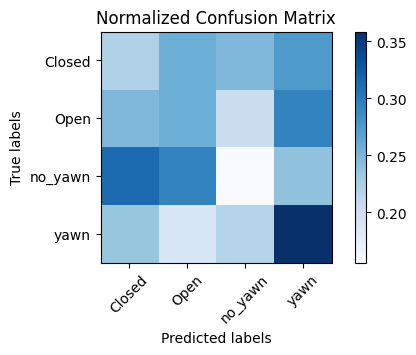

In [56]:
# Normalized Confusion Matrix:
# You can normalize the confusion matrix to show the proportion of correct and incorrect predictions for each class.

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix_norm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(len(test_batch.class_indices)), test_batch.class_indices.keys(), rotation=45)
plt.yticks(np.arange(len(test_batch.class_indices)), test_batch.class_indices.keys())
plt.title('Normalized Confusion Matrix')
plt.show()

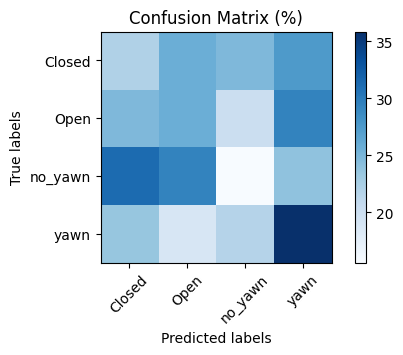

In [57]:
# Confusion Matrix with Percentage Values:
# Instead of raw counts, you can display percentages in each cell of the confusion matrix.

conf_matrix_perc = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix_perc, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(len(test_batch.class_indices)), test_batch.class_indices.keys(), rotation=45)
plt.yticks(np.arange(len(test_batch.class_indices)), test_batch.class_indices.keys())
plt.title('Confusion Matrix (%)')
plt.show()